# Project Proposal

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

**Introduction:** 
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Tennis is a popular sport among men and women all over the world. Therefore, the analysis of factors affecting performance and success is of great interest. Since tennis players' earnings can vary widely and "Prize Money” could reflect a player's earnings in tennis tournaments, understanding the determinants of prize money can provide insights into the financial success of professional tennis players. One main factor is ranking points. In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition. In our model, our research question is "Do Rankings points affect the amount of prize money a tennis player receives? " To answer the question, we will be using the data `player_stats(1).csv` from Ultimate Tennis Statistics. This data set contains the statistics of the top 500 tennis players in the world.

In [2]:
# run to read data 
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
#Tidying & Wranggling data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")

player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    separate("Prize Money", into = c("prize_money", "dash"), sep = "-")|>
    rename(plays = Plays, backhand = Backhand, name = Name)|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money)|>
    drop_na()
player_data_renamed$plays_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"



player_data_renamed

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


name,age,plays,current_rank,best_rank,backhand,prize_money,plays_dummy,backhand_dummy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Jack Draper,18,Left-handed,326,316,Two-handed,59040,0,0
Lukas Lacko,32,Right-handed,178,44,Two-handed,3261567,1,0
Duck Hee Lee,21,Right-handed,236,130,Two-handed,374093,1,0
Bernard Tomic,27,Right-handed,183,17,Two-handed,6091971,1,0
Hubert Hurkacz,22,Right-handed,31,31,Two-handed,1517157,1,0
Sekou Bangoura,28,Right-handed,307,213,Two-handed,278709,1,0
Tung Lin Wu,21,Right-handed,232,229,Two-handed,59123,1,0
Sanjar Fayziev,25,Right-handed,417,253,Two-handed,122734,1,0
Emil Ruusuvuori,20,Right-handed,104,104,Two-handed,74927,1,0


**Preliminary exploratory data analysis:**
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [65]:
player_split <- initial_split(player_data_renamed, prop = 0.75, strata = prize_money)
player_train <- training(player_split)
player_test <- testing(player_split)

Warning message:
“Removed 132 rows containing missing values (`geom_point()`).”


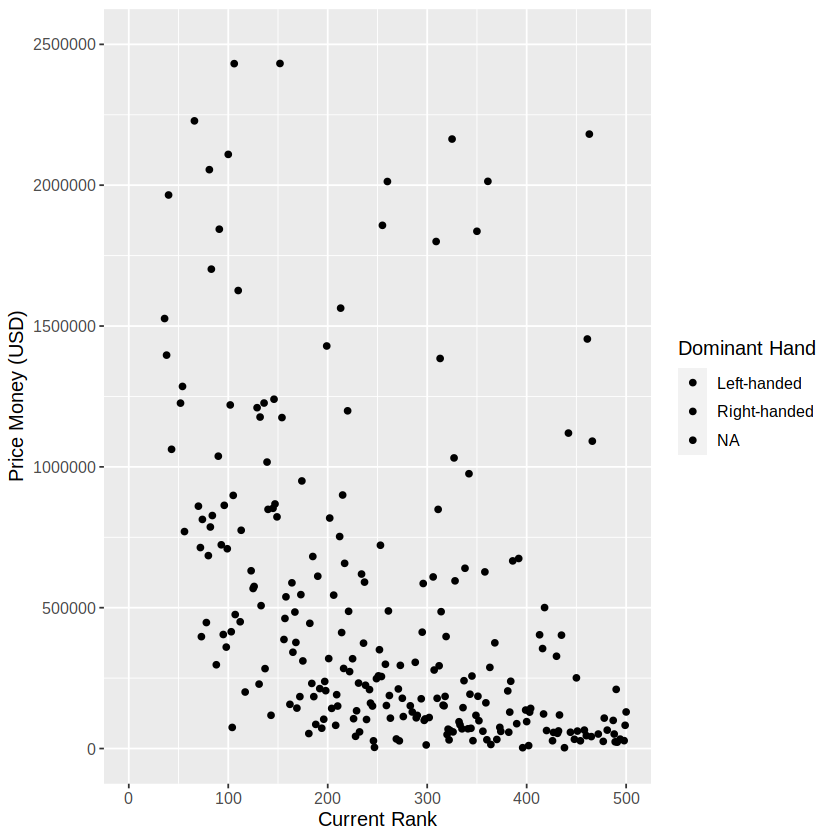

In [66]:
small_plot <- ggplot(player_train, aes(x = current_rank, y = prize_money, fill = plays)) +
  geom_point() +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Price Money (USD)") +
  labs(fill = "Dominant Hand") +
  theme(text = element_text(size = 12))

small_plot

**Methods:**
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

We will use a regression model to predict the Prize Money for tennis athlete by using multiple variables to answer our research question.

Our dependent variable is a player's earnings in tennis tournaments which is represented by "Prize Money" in our model (Unit: US dollar). Our main independent variables are best ranking points and current ranking points. Best ranking points in tennis represent a player's historical success, indicating the highest rank they've achieved, while current ranking points reveal their current standing. Analyzing both factors is crucial as historical success can impact a player's reputation, endorsements, and invitations to prestigious tournaments, whereas current performance influences tournament entries and possible prize. Best ranking points also provide insights into a player's career trajectory, showing if they've faced challenges or are on an upward trajectory. Moreover, higher current ranking points grant players entry to more tournaments, impacting earning prize.

Other important control variables include age, plays hand, and the use of backhand. We chose these control variables because they all may lead to changes in the dependent variable. We also transform qualitative variables to its respective dummy variable (For plays hand, 1 means "Right-handed" and 0 means "Left-handed; For the use of backhand, 1 means "One-handed" and 0 means "Two-handed"). Age is an essential factor to consider in this analysis. Younger players may have more energy and stamina, potentially providing them with a competitive advantage. On the other hand, older players may have the experience and strategic depth, but their physical condition may decline. Hand use, whether a player is left-handed or right-handed, can impact a player's style and game strategy, which might be reflected in their prize earnings. Finally, the choice of backhand style, whether a player employs a two-handed or one-handed backhand, can significantly affect their game. It influences shot selection, spin, and control, which might be reflected in their prize earnings.

All of these variables as they provide different dimensions of a player's career and can help create a more accurate model. 

**Expected outcomes and significance:**
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

We expect to find that the higher best ranking and current ranking will lead to a higher prize money. Since the ranking determines the level of tournament that a tennis player competes in, we can assume that the higher the tournament means the higher the rank and therefore, more prize money. 
We can use these findings to predict how much money a tennis player makes in prize money. If a new tennis player were to just start out their career, according to how their ranking is progressing we can see how much money this player is expected to make in the future. 
The question we may want to ask in the future is: Is there an interplay between the best rankings and the current rankings? Is there a correlation between them? If so, how do we determine which one has a greater impact on prize earning?